In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns

In [ ]:
df= pd.read_csv("bank-full.csv")
df.head()

In [31]:
X= df[['age', 'balance', 'duration', 'day', 'campaign', 'pdays', 'previous']]
y= df['y']

In [32]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7326  670]
 [ 629  418]]
              precision    recall  f1-score   support

          no       0.92      0.92      0.92      7996
         yes       0.38      0.40      0.39      1047

    accuracy                           0.86      9043
   macro avg       0.65      0.66      0.66      9043
weighted avg       0.86      0.86      0.86      9043



In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  
#You can change these hyperparameters like metric etc.
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
print('Accuracy on training set:',knn_clf.score(X_train,y_train))
print('Accuracy on test set:',knn_clf.score(X_test,y_test))

Accuracy on training set: 0.9096991815969918
Accuracy on test set: 0.8797965277009842


In [38]:
from sklearn.svm import SVC
kernel_svm_clf = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
print('Accuracy on training set:',kernel_svm_clf.score(X_train,y_train))
print('Accuracy on test set:',kernel_svm_clf.score(X_test,y_test))

Accuracy on training set: 0.8828522450785224
Accuracy on test set: 0.8844410040915626


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(X_train)
pca_2d = pca.transform(X_train)

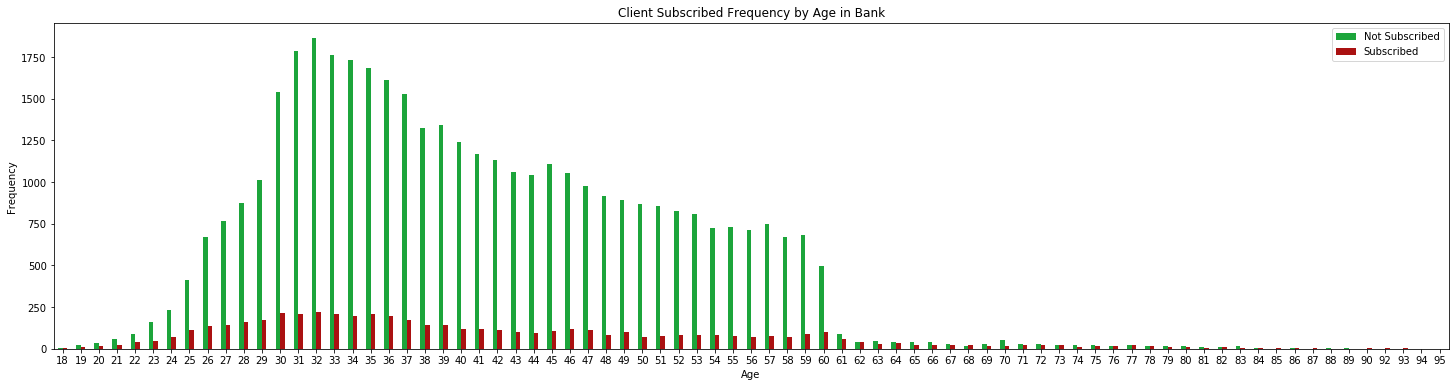

In [40]:
pd.crosstab(df.age,df.y).plot(kind="bar",figsize=(25,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency by Age in Bank')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.legend(["Not Subscribed", "Subscribed"])
plt.ylabel('Frequency')
plt.show()


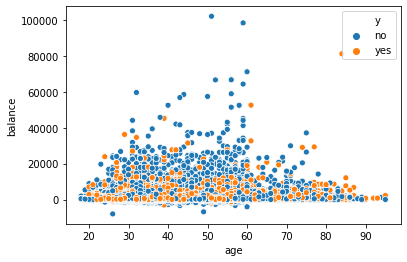

In [28]:
sns.scatterplot(x='age', y='balance',hue='y', data=df)

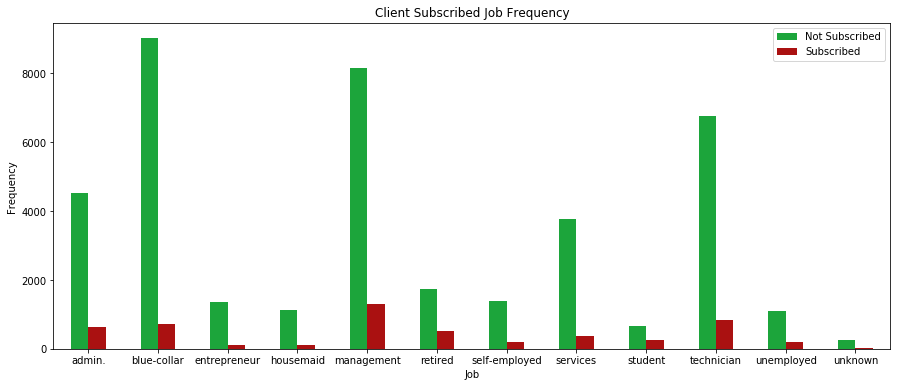

In [42]:
pd.crosstab(df.job,df.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Job Frequency')
plt.xlabel('Job')
plt.xticks(rotation=0)
plt.legend(["Not Subscribed", "Subscribed"])
plt.ylabel('Frequency')
plt.show()